<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/MACD_KODLAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

SAHOL.IS verilerini indiriyoruz...
MACD hesaplamaları yapılıyor...
Grafikleri hazırlıyoruz...


Grafikleri gösteriyoruz...


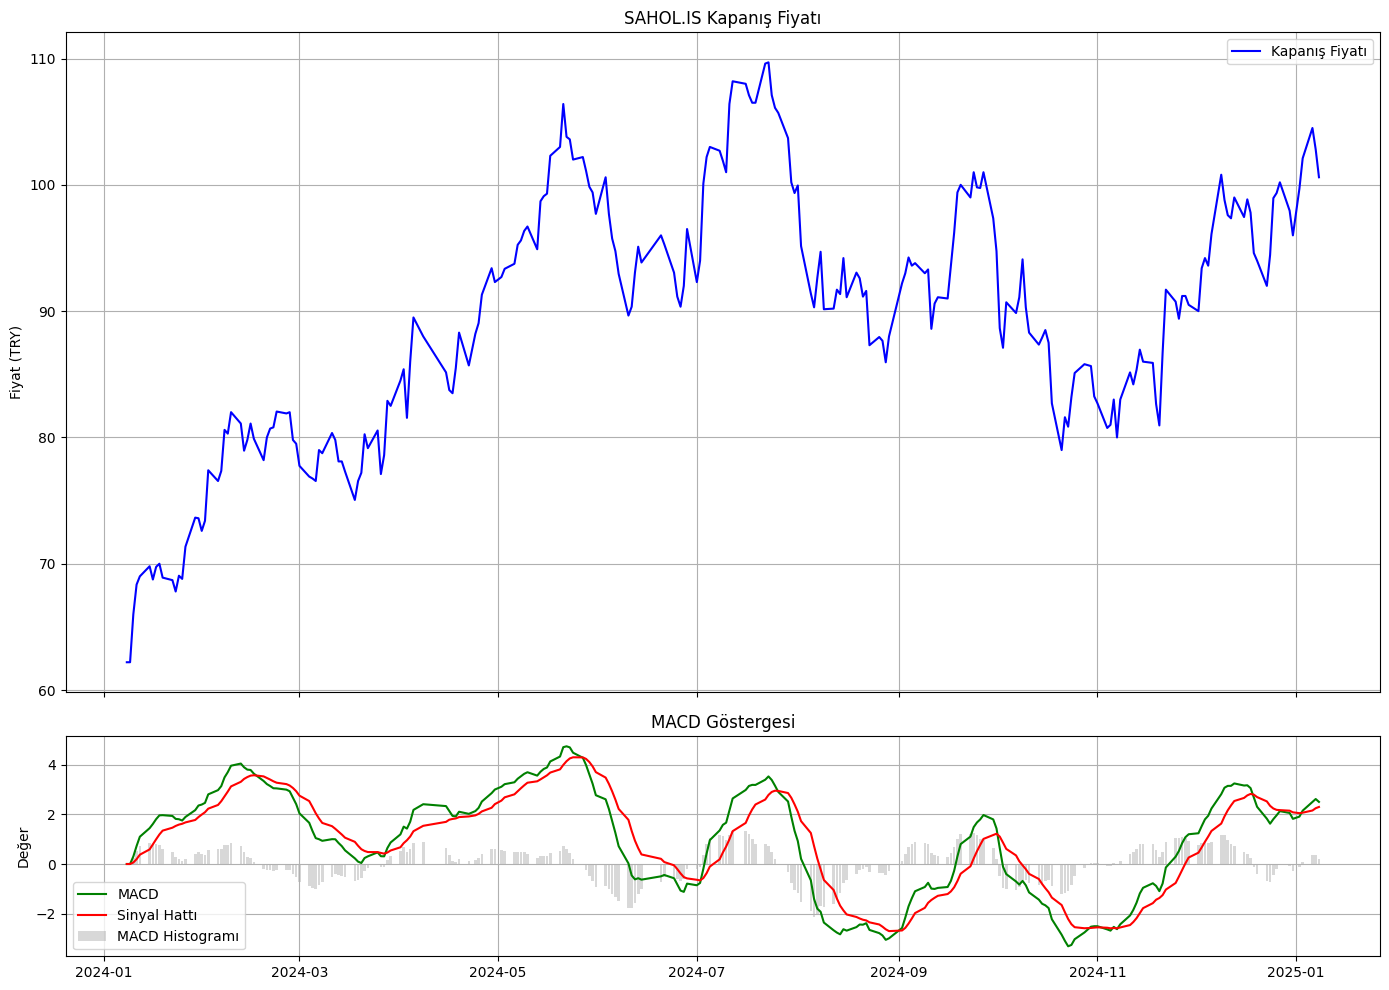

In [ ]:
import yfinance as yf  # Hisse senedi verilerini almak için yfinance kütüphanesini içe aktarıyoruz
import pandas as pd    # Verileri düzenlemek için pandas kütüphanesini ekliyoruz
import matplotlib.pyplot as plt  # Grafik çizmek için matplotlib'in pyplot modülünü ekliyoruz

# İşte, üzerinde çalışacağımız hisse senedinin sembolünü belirliyoruz
sembol = 'SAHOL.IS'

# Şimdi, yfinance ile belirtilen sembolün son bir yıla ait günlük verilerini indiriyoruz
print(f"{sembol} verilerini indiriyoruz...")
veri = yf.download(sembol, period='1y')

# Veriyi çektik, şimdi MACD hesaplamaya geçiyoruz
print("MACD hesaplamaları yapılıyor...")

# İlk olarak, 12 günlük üssel hareketli ortalamayı (EMA12) hesaplıyoruz
veri['EMA12'] = veri['Close'].ewm(span=12, adjust=False).mean()

# Sonra, 26 günlük üssel hareketli ortalamayı (EMA26) hesaplıyoruz
veri['EMA26'] = veri['Close'].ewm(span=26, adjust=False).mean()

# MACD değerini bulmak için EMA12'den EMA26'yı çıkarıyoruz
veri['MACD'] = veri['EMA12'] - veri['EMA26']

# Sinyal hattını oluşturmak için MACD'nin 9 günlük üssel hareketli ortalamasını alıyoruz
veri['Sinyal'] = veri['MACD'].ewm(span=9, adjust=False).mean()

# Şimdi, iki ayrı grafik alanı (subplot) oluşturuyoruz: biri fiyatlar diğeri MACD için
print("Grafikleri hazırlıyoruz...")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                               gridspec_kw={'height_ratios': [3, 1]})

# Üst grafikte kapanış fiyatlarını çiziyoruz
ax1.plot(veri.index, veri['Close'], label='Kapanış Fiyatı', color='blue')
ax1.set_title(f'{sembol} Kapanış Fiyatı')  # Grafiğe başlık ekliyoruz
ax1.set_ylabel('Fiyat (TRY)')  # Y eksenine etiket koyuyoruz
ax1.legend()  # Grafikteki çizgilerin etiketlerini gösteriyoruz
ax1.grid(True)  # Grafiğe ızgara ekliyoruz ki daha kolay takip edebilesin

# Alt grafikte MACD göstergesini çiziyoruz
ax2.plot(veri.index, veri['MACD'], label='MACD', color='green')  # MACD çizgisi
ax2.plot(veri.index, veri['Sinyal'], label='Sinyal Hattı', color='red')  # Sinyal hattı
ax2.bar(veri.index, veri['MACD'] - veri['Sinyal'], label='MACD Histogramı', color='grey', alpha=0.3)  # MACD histogramı

ax2.set_title('MACD Göstergesi')  # Alt grafiğe başlık ekliyoruz
ax2.set_ylabel('Değer')  # Y eksenine etiket koyuyoruz
ax2.legend()  # Grafikteki çizgilerin etiketlerini gösteriyoruz
ax2.grid(True)  # Grafiğe ızgara ekliyoruz

# Grafikleri birbirine girmemesi için düzenliyoruz
plt.tight_layout()

# Son olarak, grafikleri ekranda gösteriyoruz
print("Grafikleri gösteriyoruz...")
plt.show()

